<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DATA" data-toc-modified-id="DATA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Target</a></span></li></ul></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Product-price" data-toc-modified-id="Product-price-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Product price</a></span><ul class="toc-item"><li><span><a href="#Merge-price-column-to-df" data-toc-modified-id="Merge-price-column-to-df-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Merge price column to df</a></span></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li><li><span><a href="#Dealing-with-NaNs" data-toc-modified-id="Dealing-with-NaNs-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Dealing with NaNs</a></span></li></ul></li><li><span><a href="#Discount" data-toc-modified-id="Discount-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Discount</a></span><ul class="toc-item"><li><span><a href="#Merge-Discount-column-to-df" data-toc-modified-id="Merge-Discount-column-to-df-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Merge Discount column to df</a></span></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li><li><span><a href="#Merge-with-PandasSQL" data-toc-modified-id="Merge-with-PandasSQL-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Merge with PandasSQL</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import os

## DATA

### Dataset

In [2]:
data_root="../data/"
datafile=os.path.join(data_root,'dfjoin_usertype_Scount_daysSLS_landing_campaign_srceMed_city_device_OS_2019_2020_jan21.csv')
df=pd.read_csv(datafile)
print(df.shape)
df.head(3)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(3654882, 18)


,Unnamed: 0,ga:productSKU,ga:dateHourMinute,ga:pagePath,ga:pageDepth,ga:userType,ga:sessionCount,ga:daysSinceLastSession,ga:landingPagePath,ga:campaign,ga:sourceMedium,ga:city,ga:deviceCategory,ga:operatingSystem,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
0,0,1008,201904301452,/parafarmacia/es/,1,New Visitor,1,0,/parafarmacia/es/,(not set),(direct) / (none),Burgos,mobile,iOS,1,0,0,0
1,1,1008,201904301524,/parafarmacia/es/,3,New Visitor,1,0,/parafarmacia/es/,(not set),(direct) / (none),Madrid,desktop,Windows,1,0,0,0
2,2,1008,201904301545,/parafarmacia/es/,7,Returning Visitor,33,0,/parafarmacia/es/,(not set),merchants.google.com / referral,Zamudio,desktop,Windows,1,0,0,0


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.shape)
print("")
df.info()

(3654882, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654882 entries, 0 to 3654881
Data columns (total 17 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ga:productSKU            object
 1   ga:dateHourMinute        int64 
 2   ga:pagePath              object
 3   ga:pageDepth             int64 
 4   ga:userType              object
 5   ga:sessionCount          int64 
 6   ga:daysSinceLastSession  int64 
 7   ga:landingPagePath       object
 8   ga:campaign              object
 9   ga:sourceMedium          object
 10  ga:city                  object
 11  ga:deviceCategory        object
 12  ga:operatingSystem       object
 13  ga:productListViews      int64 
 14  ga:productListClicks     int64 
 15  ga:productDetailViews    int64 
 16  ga:productAddsToCart     int64 
dtypes: int64(8), object(9)
memory usage: 474.0+ MB


### Target

In [3]:
df['ga:productAddsToCart_transf']=df["ga:productAddsToCart"].apply(lambda x: 1 if x>1 else x)

print("No. observations per class")
print(df['ga:productAddsToCart_transf'].value_counts())
print("")

print("% observations per class")
print(100*df['ga:productAddsToCart_transf'].value_counts(normalize=True))

No. observations per class
0    3586668
1      68214
Name: ga:productAddsToCart_transf, dtype: int64

% observations per class
0    98.13362
1     1.86638
Name: ga:productAddsToCart_transf, dtype: float64


## Functions

## Product price

### Merge price column to df

In [27]:
# Product Catalog dataset
prod_datafile=os.path.join(data_root,'product_2021-02-09_103558.csv')
prod_info=pd.read_csv(prod_datafile,sep=";")
prod_info.head(5)

,Product ID,Imagen,Nombre,Referencia,Categoría,Precio (imp. excl.),Precio (imp. incl.),Cantidad,Estado,Posición
0,7878,https://www.galileo61.com/6882/my-organics-70-...,My organics 7.0 Rubio / Blonde,NaN,Novedades,12.314050,14.9,50.0,0,NaN
1,7877,https://www.galileo61.com/6881/my-organics-80-...,My Organics 8.0 Rubio Claro / Light Blonde,NaN,Baño e higiene personal,12.314050,14.9,50.0,0,NaN
2,7876,https://www.galileo61.com/6880/aceite-corporal...,Aceite corporal quemagrasas tacto seco Fat bur...,NaN,Reafirmantes.,61.983471,75.0,40.0,0,NaN
3,7875,https://www.galileo61.com/6879/aceite-anticelu...,Aceite anticelulítico tacto seco: Slimming Oil...,NaN,Inicio,74.380165,90.0,40.0,0,NaN
4,7874,https://www.galileo61.com/6878/aceite-reafirma...,Aceite reafirmante tacto seco Firming Oil 50ml...,NaN,Reafirmantes.,57.851240,70.0,40.0,0,NaN


In [28]:
prod_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           3899 non-null   int64  
 1   Imagen               3899 non-null   object 
 2   Nombre               3898 non-null   object 
 3   Referencia           3386 non-null   object 
 4   Categoría            3660 non-null   object 
 5   Precio (imp. excl.)  3899 non-null   float64
 6   Precio (imp. incl.)  3899 non-null   float64
 7   Cantidad             3898 non-null   float64
 8   Estado               3899 non-null   int64  
 9   Posición             0 non-null      float64
dtypes: float64(4), int64(2), object(4)
memory usage: 304.7+ KB


In [29]:
prod_price_info=prod_info[['Product ID','Precio (imp. incl.)']]
prod_price_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           3899 non-null   int64  
 1   Precio (imp. incl.)  3899 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 61.0 KB


In [30]:
df['ga:productSKU']= df['ga:productSKU'].astype('str')
prod_price_info['Product ID']=prod_price_info['Product ID'].astype('str')
df = df.merge(prod_price_info,left_on='ga:productSKU', right_on='Product ID',how='left')
df.drop('Product ID',axis=1,inplace=True)
df.info()

<ipython-input-30-53f9f9fa6b5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_price_info['Product ID']=prod_price_info['Product ID'].astype('str')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3654882 entries, 0 to 3654881
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ga:productSKU                object 
 1   ga:dateHourMinute            int64  
 2   ga:pagePath                  object 
 3   ga:pageDepth                 int64  
 4   ga:userType                  object 
 5   ga:sessionCount              int64  
 6   ga:daysSinceLastSession      int64  
 7   ga:landingPagePath           object 
 8   ga:campaign                  object 
 9   ga:sourceMedium              object 
 10  ga:city                      object 
 11  ga:deviceCategory            object 
 12  ga:operatingSystem           object 
 13  ga:productListViews          int64  
 14  ga:productListClicks         int64  
 15  ga:productDetailViews        int64  
 16  ga:productAddsToCart         int64  
 17  ga:productAddsToCart_transf  int64  
 18  Precio (imp. incl.)          float64
dtype

In [31]:
df.rename(columns={"Precio (imp. incl.)": "Product_price"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3654882 entries, 0 to 3654881
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ga:productSKU                object 
 1   ga:dateHourMinute            int64  
 2   ga:pagePath                  object 
 3   ga:pageDepth                 int64  
 4   ga:userType                  object 
 5   ga:sessionCount              int64  
 6   ga:daysSinceLastSession      int64  
 7   ga:landingPagePath           object 
 8   ga:campaign                  object 
 9   ga:sourceMedium              object 
 10  ga:city                      object 
 11  ga:deviceCategory            object 
 12  ga:operatingSystem           object 
 13  ga:productListViews          int64  
 14  ga:productListClicks         int64  
 15  ga:productDetailViews        int64  
 16  ga:productAddsToCart         int64  
 17  ga:productAddsToCart_transf  int64  
 18  Product_price                float64
dtype

### Exploratory Analysis

In [32]:
df['Product_price'].describe()

count    3.344233e+06
mean     3.496070e+01
std      3.450897e+01
min      0.000000e+00
25%      1.150000e+01
50%      2.765000e+01
75%      4.500000e+01
max      2.834000e+02
Name: Product_price, dtype: float64

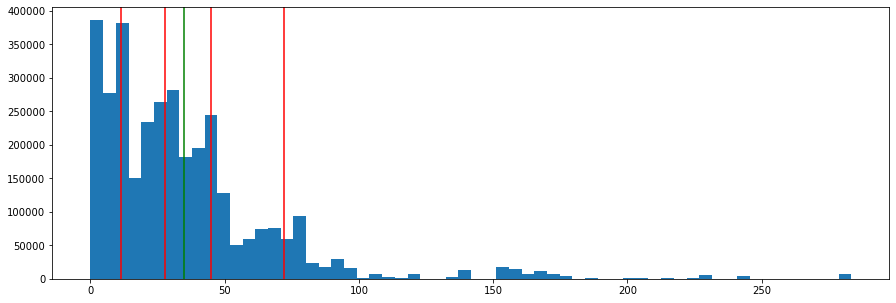

In [33]:
plt.figure(figsize=(15,5))
plt.hist(df['Product_price'],bins=60)
plt.axvline(x=np.mean(df['Product_price']), c= "green")
plt.axvline(x=np.nanpercentile(df['Product_price'],25), c= "red")
plt.axvline(x=np.nanpercentile(df['Product_price'],50), c= "red")
plt.axvline(x=np.nanpercentile(df['Product_price'],75), c= "red")
plt.axvline(x=np.nanpercentile(df['Product_price'],90), c= "red")
plt.show();

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


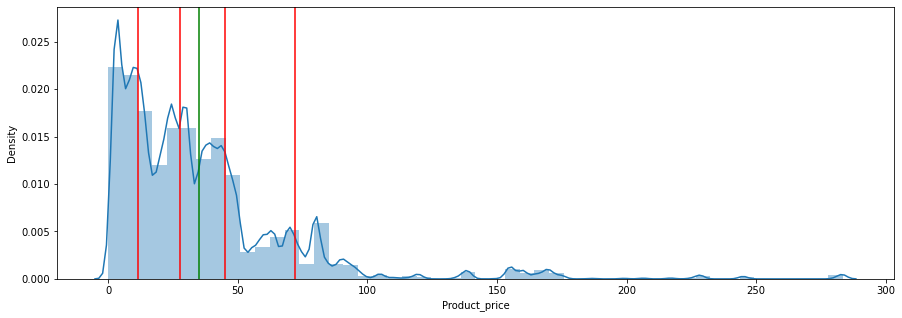

In [34]:
plt.figure(figsize=(15,5))
sns.distplot(df['Product_price'].dropna().astype(float))
plt.axvline(x=np.mean(df['Product_price']), c= "green")
plt.axvline(x=np.nanpercentile(df['Product_price'],25), c= "red")
plt.axvline(x=np.nanpercentile(df['Product_price'],50), c= "red")
plt.axvline(x=np.nanpercentile(df['Product_price'],75), c= "red")
plt.axvline(x=np.nanpercentile(df['Product_price'],90), c= "red")
plt.show();

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='Product_price'>

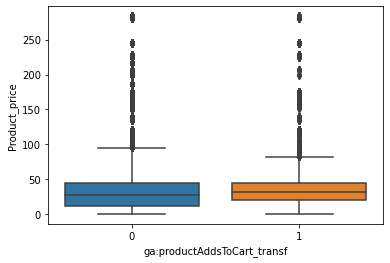

In [35]:
sns.boxplot(data=df,x=df['ga:productAddsToCart_transf'],y=df['Product_price'])

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='Product_price'>

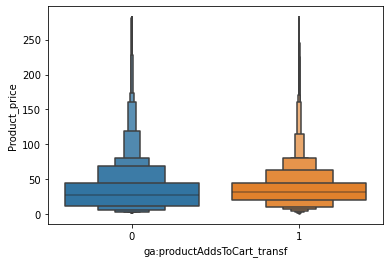

In [36]:
sns.boxenplot(data=df,x=df['ga:productAddsToCart_transf'],y=df['Product_price'])

In [37]:
df[df["ga:productAddsToCart_transf"]==1]['Product_price'].describe()

count    62555.000000
mean        36.573690
std         26.949414
min          0.000000
25%         19.950000
50%         31.900000
75%         44.900000
max        283.400000
Name: Product_price, dtype: float64

In [38]:
df[df["ga:productAddsToCart_transf"]==0]['Product_price'].describe()

count    3.281678e+06
mean     3.492996e+01
std      3.463632e+01
min      0.000000e+00
25%      1.111000e+01
50%      2.700000e+01
75%      4.500000e+01
max      2.834000e+02
Name: Product_price, dtype: float64

Veamos si efectivamente las medianas son significativamente diferentes. Para ello, aplicaremos el test Mam Withney U que establece como Ho que ambas medianas son iguales. 

He escogido este test frente a Wilcoxon Test por la diferencia en la dispersión de los datos que se ha señalado anteriormente. Mientras que Wilcoxon requiere que las 2 desviaciones tipocas sean igual, Mam Whitney no. (CONSULTAR PROFE - no se como interpretar en este caso muestras relacionadas o independientes).

In [39]:
stats.mannwhitneyu(df[df['ga:productAddsToCart_transf']==1]['Product_price'], df[df['ga:productAddsToCart_transf']==0]['Product_price'])

MannwhitneyuResult(statistic=110697441680.5, pvalue=0.0)

P-value es menor a 5%. Rechazamos Ho y podemos afirmar que las medianas de ambas distribuciones son diferentes y por lo tanto existen diferencias significativas entre ambas. 

### Dealing with NaNs

In [40]:
df.shape

(3654882, 19)

In [41]:
df[df['Product_price'].isna()].shape

(310649, 19)

In [42]:
na_rows = df[df['Product_price'].isna()]
na_rows['ga:productSKU'].nunique()

1800

In [43]:
na_rows['ga:productSKU'].value_counts()

1113    34568
1009    29629
973     28052
1159    27980
1161    13464
        ...  
3830        1
3568        1
1556        1
2731        1
2209        1
Name: ga:productSKU, Length: 1800, dtype: int64

Lo ideal a la hora de imputar los NaNs sería calcular el precio medio (o mediana) para cada una de las categorías a las que pertenece cada producto. Es previsible que el rango de precios no sea el mismo para una crema que para unas tiritas. 

De momento no contamos con ese dato, asi que optaremos por imputar la mediana global, para contrarrestar el sesgo que produce la larga cola que se aprecia en el histograma y el boxplot.

ACLARACION: La columna 'Categoría' del Catalogo de productos de Prestashop que hemos utilizado para importar los precios, no corresponde a la categoría del producto propiamente dicha sino a la página a la que se encuentra anidada el producto en la web en el momento en el que se descargó el catalógo. 

In [44]:
df['Product_price'].fillna(df['Product_price'].median(),inplace=True)
df['Product_price'].isna().any()

False

## Discount

### Merge Discount column to df

In [4]:
# Discounts CSV
disc_datafile=os.path.join(data_root,'Descuentos.csv')
disc_info=pd.read_csv(disc_datafile,sep=";")
disc_info

,Nombre,PORCENTAJE DESCUENTO,FECHA INICIO,FECHA FIN
0,REBAJAS15,0.15,202101020935,202101060001
1,XMASGALILEO,0.10,202012200927,202012291215
2,Descuento BLACK FRIDAY,0.25,202011222200,202012010002
3,Descuento BLACK FRIDAY,0.25,202011121400,202011170000
4,halloween10,0.10,202010301100,202011020001
5,Galileo Lovers 15,0.15,202009291319,202010050002
6,ultimosdias,0.15,202008241520,202009021000
7,Descuentos verano,0.15,202007071631,202007100001
8,Verano Galileo 15% dto,0.15,202006282142,202007071517
9,cupon flash cuerpo 20%,0.20,202006141910,202006150000


In [5]:
disc_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nombre                15 non-null     object 
 1   PORCENTAJE DESCUENTO  15 non-null     float64
 2   FECHA INICIO          15 non-null     int64  
 3   FECHA FIN             15 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 608.0+ bytes


In [6]:
disc_info['FECHA INICIO']=pd.to_datetime(disc_info['FECHA INICIO'],format='%Y%m%d%H%M')
disc_info['FECHA FIN']=pd.to_datetime(disc_info['FECHA FIN'],format='%Y%m%d%H%M')
disc_info[['FECHA INICIO','FECHA FIN']]

,FECHA INICIO,FECHA FIN
0,2021-01-02 09:35:00,2021-01-06 00:01:00
1,2020-12-20 09:27:00,2020-12-29 12:15:00
2,2020-11-22 22:00:00,2020-12-01 00:02:00
3,2020-11-12 14:00:00,2020-11-17 00:00:00
4,2020-10-30 11:00:00,2020-11-02 00:01:00
5,2020-09-29 13:19:00,2020-10-05 00:02:00
6,2020-08-24 15:20:00,2020-09-02 10:00:00
7,2020-07-07 16:31:00,2020-07-10 00:01:00
8,2020-06-28 21:42:00,2020-07-07 15:17:00
9,2020-06-14 19:10:00,2020-06-15 00:00:00


In [7]:
df['dateTime']=pd.to_datetime(df['ga:dateHourMinute'],format='%Y%m%d%H%M')
df['dateTime']

0         2019-04-30 14:52:00
1         2019-04-30 15:24:00
2         2019-04-30 15:45:00
3         2019-04-30 17:04:00
4         2019-04-30 14:52:00
                  ...        
3654877   2021-01-09 21:23:00
3654878   2021-01-09 21:24:00
3654879   2021-01-12 06:07:00
3654880   2021-01-13 15:47:00
3654881   2021-01-14 16:18:00
Name: dateTime, Length: 3654882, dtype: datetime64[ns]

In [8]:
disc_info.rename(columns={"PORCENTAJE DESCUENTO": "PORCENTAJE_DESCUENTO","FECHA INICIO": "FECHA_INICIO","FECHA FIN": "FECHA_FIN"}, inplace=True)
disc_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Nombre                15 non-null     object        
 1   PORCENTAJE_DESCUENTO  15 non-null     float64       
 2   FECHA_INICIO          15 non-null     datetime64[ns]
 3   FECHA_FIN             15 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 608.0+ bytes


In [10]:
def discount(date):
    discount=0
    for index,row in disc_info.iterrows():
        if (date>=row['FECHA_INICIO']) & (date<=row['FECHA_FIN']):
            discount += row['PORCENTAJE_DESCUENTO']
        else:
            discount += 0
    return discount

In [11]:
df['Web_Discount']= df['dateTime'].apply(discount)

In [18]:
df.sample(20)

,ga:productSKU,ga:dateHourMinute,ga:pagePath,ga:pageDepth,ga:userType,ga:sessionCount,ga:daysSinceLastSession,ga:landingPagePath,ga:campaign,ga:sourceMedium,ga:city,ga:deviceCategory,ga:operatingSystem,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf,dateTime,Web_Discount
2616823,6666,202012151620,/es/881-contorno-premium,10,Returning Visitor,13,27,/es/,BF_VIP_2020_redcordatorio,sendinblue / email,Madrid,desktop,Windows,1,0,0,0,0,2020-12-15 16:20:00,0.00
1869697,6317,202011261423,/es/903-top-ventas,23,Returning Visitor,3,0,/es/blog/cremas-caudalie-opiniones,(not set),google / organic,Valladolid,desktop,Windows,1,0,0,0,0,2020-11-26 14:23:00,0.25
2458123,3158,202012271004,/es/brand/494-svr,5,New Visitor,1,0,/es/brand/494-svr,Navidad_2020,sendinblue / email,Almeria,mobile,Android,1,0,0,0,0,2020-12-27 10:04:00,0.10
967330,1021,202007071811,/parafarmacia/es/,5,Returning Visitor,3,0,/parafarmacia/es/,(not set),(direct) / (none),Barcelona,mobile,iOS,1,0,0,0,0,2020-07-07 18:11:00,0.15
815137,6641,202005181759,/parafarmacia/es/6641-mascarilla-infantil-n95-...,2,New Visitor,1,0,/parafarmacia/es/,(not set),(direct) / (none),Zaragoza,mobile,iOS,0,1,1,0,0,2020-05-18 17:59:00,0.00
1298450,1049,202010121939,/parafarmacia/es/,3,New Visitor,1,0,/parafarmacia/es/,(not set),(direct) / (none),Madrid,mobile,iOS,1,0,0,0,0,2020-10-12 19:39:00,0.00
291556,1021,202004101604,/parafarmacia/es/,1,Returning Visitor,8,12,/parafarmacia/es/,(not set),google / organic,Madrid,mobile,iOS,1,0,0,0,0,2020-04-10 16:04:00,0.00
1176204,1167,202009060002,/parafarmacia/es/,7,New Visitor,1,0,/parafarmacia/es/,(not set),google / organic,Linares,mobile,Android,1,0,0,0,0,2020-09-06 00:02:00,0.00
2216472,7340,202011292033,/es/826-hidratantes?order=product.position.asc...,45,Returning Visitor,2,0,/es/top-ventas/6337-skinperfection-bluevert-co...,Champions shopping,google / cpc,Logrono,mobile,Android,1,0,0,0,0,2020-11-29 20:33:00,0.25
2229832,7356,202011222236,/es/brand/614-esthederm,16,Returning Visitor,2,0,/es/,(not set),google / organic,(not set),tablet,iOS,1,0,0,0,0,2020-11-22 22:36:00,0.25


In [15]:
df.to_csv(data_root+'dfjoin_usertype_Scount_daysSLS_landing_campaign_srceMed_city_device_OS_discount_2019_2020_jan21.csv')

### Exploratory Analysis

In [19]:
df['Web_Discount'].describe()

count    3.654882e+06
mean     6.084621e-02
std      9.579053e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e-01
max      2.500000e-01
Name: Web_Discount, dtype: float64

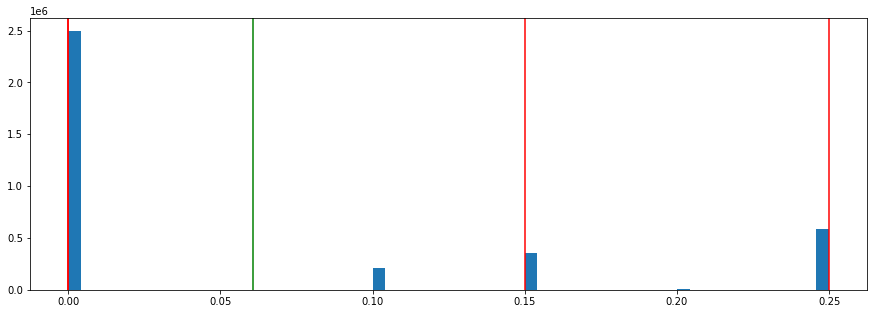

In [20]:
plt.figure(figsize=(15,5))
plt.hist(df['Web_Discount'],bins=60)
plt.axvline(x=np.mean(df['Web_Discount']), c= "green")
plt.axvline(x=np.percentile(df['Web_Discount'],25), c= "red")
plt.axvline(x=np.percentile(df['Web_Discount'],50), c= "red")
plt.axvline(x=np.percentile(df['Web_Discount'],75), c= "red")
plt.axvline(x=np.percentile(df['Web_Discount'],90), c= "red")
plt.show();

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='Web_Discount'>

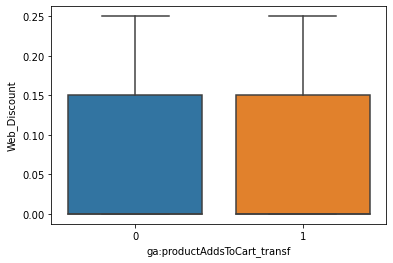

In [22]:
sns.boxplot(data=df,x=df['ga:productAddsToCart_transf'],y=df['Web_Discount'])

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='Web_Discount'>

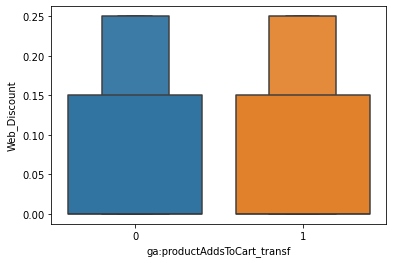

In [23]:
sns.boxenplot(data=df,x=df['ga:productAddsToCart_transf'],y=df['Web_Discount'])

In [25]:
df[df["ga:productAddsToCart_transf"]==1]['Web_Discount'].describe()

count    68214.000000
mean         0.066220
std          0.099885
min          0.000000
25%          0.000000
50%          0.000000
75%          0.150000
max          0.250000
Name: Web_Discount, dtype: float64

In [27]:
df[df["ga:productAddsToCart_transf"]==0]['Web_Discount'].describe()

count    3.586668e+06
mean     6.074401e-02
std      9.570806e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e-01
max      2.500000e-01
Name: Web_Discount, dtype: float64

In [28]:
stats.mannwhitneyu(df[df['ga:productAddsToCart_transf']==1]['Web_Discount'], df[df['ga:productAddsToCart_transf']==0]['Web_Discount'])

MannwhitneyuResult(statistic=119669233925.0, pvalue=9.724597762541748e-33)

In [48]:
df['Web_Discount'].value_counts(normalize=True)


0.00    0.683160
0.25    0.160944
0.15    0.098426
0.10    0.056477
0.20    0.000993
Name: Web_Discount, dtype: float64

Web_Discount
0.00    45673
0.10     2459
0.15     7430
0.20      126
0.25    12526
Name: ga:productAddsToCart_transf, dtype: int64


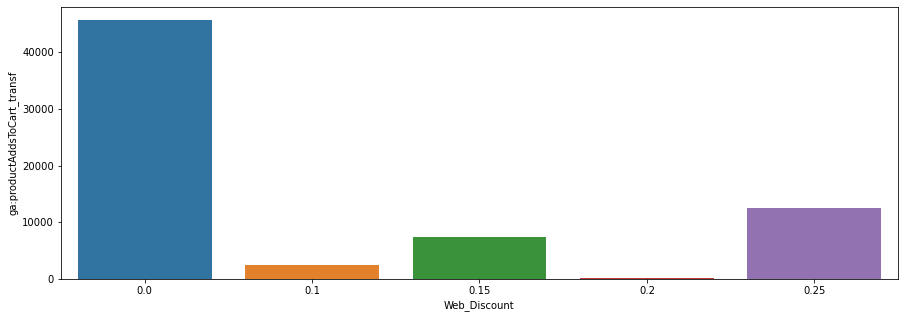

In [33]:
def conversions_per_label(df,feature):
    conversions_per_label=df.groupby(feature)['ga:productAddsToCart_transf'].sum()
    print(conversions_per_label)
    return pd.DataFrame(conversions_per_label)

conversions_discount = conversions_per_label(df,df['Web_Discount']).reset_index().sort_values(by='ga:productAddsToCart_transf',ascending=False)
plt.figure(figsize=(15,5))
barplot = sns.barplot(x=conversions_discount['Web_Discount'],y=conversions_discount['ga:productAddsToCart_transf'])

Web_Discount
0.00    1.829210
0.10    1.191284
0.15    2.065409
0.20    3.472988
0.25    2.129428
dtype: float64


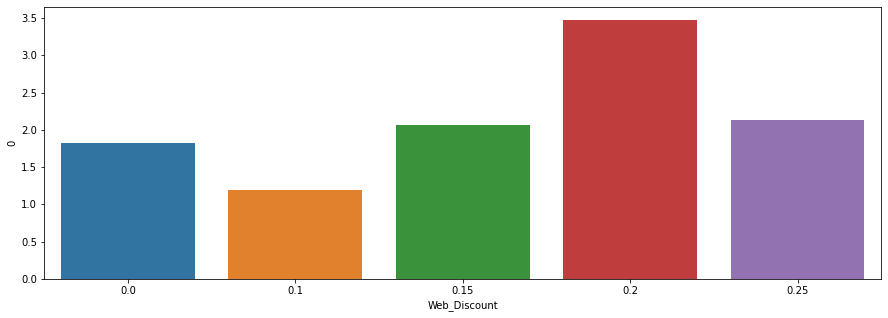

In [34]:
def calc_prevalence(y):
    return (sum(y)/len(y))*100

def prevalence_per_label(df,feature):
    prevalence_per_label=df.groupby(feature).apply(lambda x: calc_prevalence(x['ga:productAddsToCart_transf']))
    print(prevalence_per_label)
    return pd.DataFrame(prevalence_per_label)

prevalence_discount= prevalence_per_label(df,df['Web_Discount']).reset_index().sort_values(by=0,ascending=False)
plt.figure(figsize=(15,5))
barplot = sns.barplot(x=prevalence_discount['Web_Discount'],y=prevalence_discount[0])

In [43]:
plot_data = df.pivot_table(index='Web_Discount',columns='ga:productAddsToCart_transf',values='ga:dateHourMinute', aggfunc='count')
plot_data['total_inter']=plot_data[0]+plot_data[1]
plot_data = plot_data.merge(prevalence_discount,left_on='Web_Discount', right_on='Web_Discount',how='inner')
plot_data.columns=['Web_Discount','0','1','total_inter', 'preval']
plot_data['Web_Discount']=plot_data['Web_Discount'].astype(str)
plot_data = plot_data.sort_values(by='total_inter',ascending=False).head(35).reset_index()
plot_data

,index,Web_Discount,0,1,total_inter,preval
0,0,0.0,2451197,45673,2496870,1.829210
1,4,0.25,575707,12526,588233,2.129428
2,2,0.15,352305,7430,359735,2.065409
3,1,0.1,203957,2459,206416,1.191284
4,3,0.2,3502,126,3628,3.472988


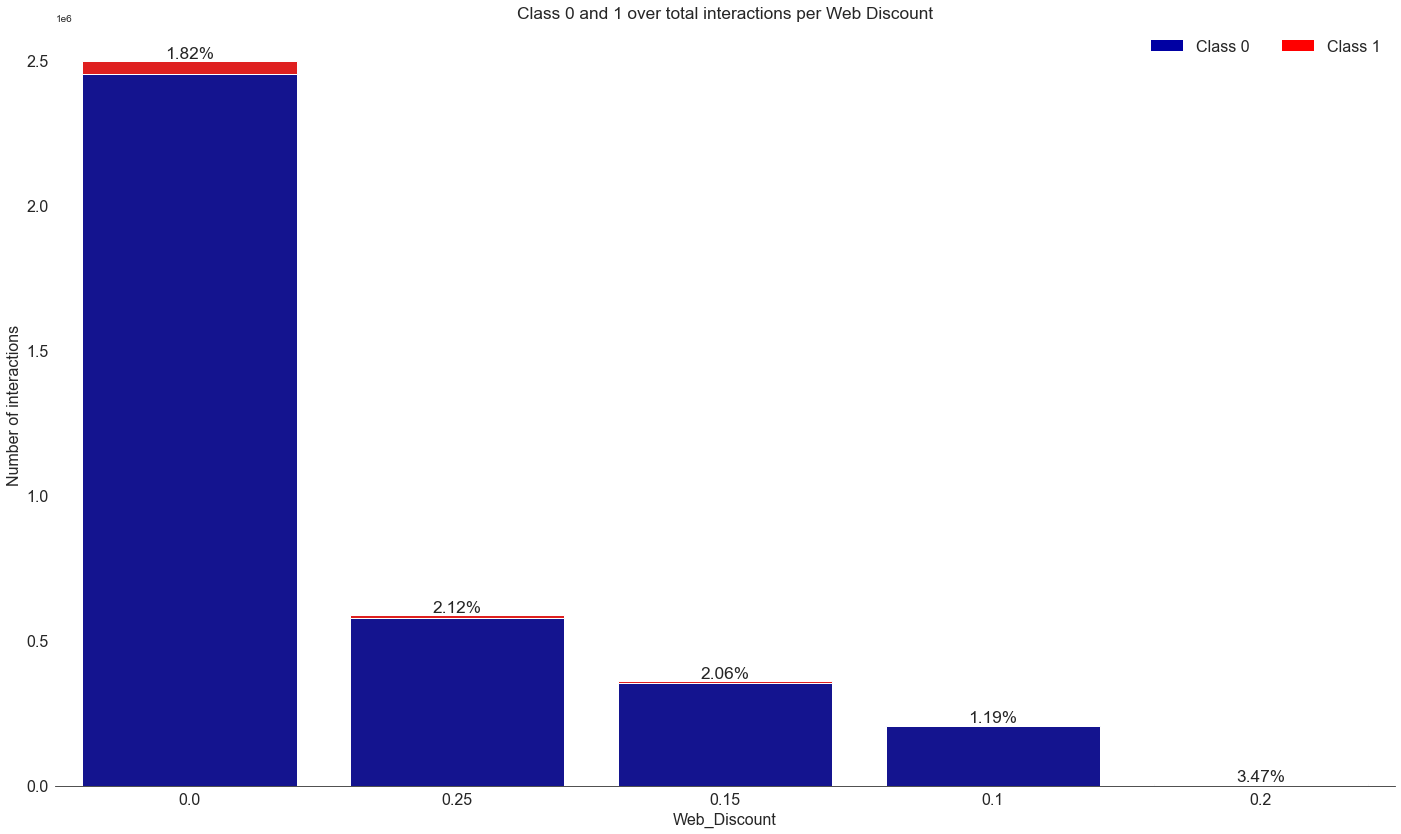

In [46]:
#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 14)})

#Plot 1 - background - Total interations
sns.barplot(x = plot_data['Web_Discount'], y = plot_data['total_inter'], color = "red")

#Plot 2 - overlay - Class 0
bottom_plot = sns.barplot(x = plot_data['Web_Discount'], y = plot_data['0'], color = "#0000A3")

topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Class 0', 'Class 1'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)


sns.despine(left=True)
bottom_plot.set_ylabel("Number of interactions")
bottom_plot.set_xlabel("Web_Discount")
bottom_plot.set_title("Class 0 and 1 over total interactions per Web Discount", fontsize='xx-large')

for i in range(len(plot_data['0'])):
    plt.annotate(str(plot_data['preval'].values[i])[:4]+"%", xy=(i,plot_data['total_inter'].values[i]), ha='center', va='bottom',fontsize='xx-large')


#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

### Merge with PandasSQL

In [11]:
import pandasql as ps

sqlcode = '''
SELECT df.dateTime
FROM df
LEFT JOIN disc_info.PORCENTAJE_DESCUENTO
ON df.dateTime>=disc_info.FECHA_INICIO AND df.dateTime<=disc_info.FECHA_FIN
'''

newdf = ps.sqldf(sqlcode,locals())

PandaSQLException: (sqlite3.OperationalError) no such table: disc_info.PORCENTAJE_DESCUENTO
[SQL: 
SELECT df.dateTime
FROM df
LEFT JOIN disc_info.PORCENTAJE_DESCUENTO
ON df.dateTime>=disc_info.FECHA_INICIO AND df.dateTime<=disc_info.FECHA_FIN
]
(Background on this error at: http://sqlalche.me/e/14/e3q8)

In [ ]:
import pandasql as ps

sqlcode = '''
SELECT disc_info.PORCENTAJE_DESCUENTO
FROM disc_info
JOIN df.index
WHERE df.dateTime>=disc_info.FECHA_INICIO AND df.dateTime<=disc_info.FECHA_FIN
'''

newdf = ps.sqldf(sqlcode,locals())

In [23]:
import pandasql as ps

sqlcode = '''
SELECT disc_info.PORCENTAJE_DESCUENTO
FROM disc_info
LEFT JOIN df 
ON df.dateTime>=disc_info.FECHA_INICIO AND df.dateTime<=disc_info.FECHA_FIN
'''

newdf = ps.sqldf(sqlcode,locals())

In [9]:
import pandasql as ps

sqlcode = '''
SELECT disc_info.PORCENTAJE_DESCUENTO
FROM disc_info
JOIN df.index
WHERE df.dateTime>=disc_info.FECHA_INICIO AND df.dateTime<=disc_info.FECHA_FIN
'''

newdf = ps.sqldf(sqlcode,locals())

PandaSQLException: (sqlite3.OperationalError) near "index": syntax error
[SQL: 
SELECT disc_info.PORCENTAJE_DESCUENTO
FROM disc_info
JOIN df.index
WHERE df.dateTime>=disc_info.FECHA_INICIO AND df.dateTime<=disc_info.FECHA_FIN
]
(Background on this error at: http://sqlalche.me/e/14/e3q8)

In [11]:
newdf.shape

(1158012, 1)

In [12]:
newdf.sample(20)

,PORCENTAJE_DESCUENTO
69942,0.15
172171,0.10
17202,0.15
18780,0.15
839400,0.15
200671,0.10
409256,0.25
629531,0.25
834963,0.15
311106,0.25


In [13]:
join_disc= df.merge(newdf,left_index=True, right_index=True, how='left')
join_disc.sample(20)

,ga:productSKU,ga:dateHourMinute,ga:pagePath,ga:pageDepth,ga:userType,ga:sessionCount,ga:daysSinceLastSession,ga:landingPagePath,ga:campaign,ga:sourceMedium,ga:city,ga:deviceCategory,ga:operatingSystem,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf,dateTime,PORCENTAJE_DESCUENTO
149915,6336,202002262227,/parafarmacia/es/6336-skinperfection-ultimate-...,1,New Visitor,1,0,/parafarmacia/es/6336-skinperfection-ultimate-...,(not set),google / organic,Albacete,mobile,Android,0,0,1,0,0,2020-02-26 22:27:00,0.10
2932067,2504,202101082100,/es/825-limpiadores?page=3,21,New Visitor,1,0,/es/,(not set),google / organic,Madrid,mobile,iOS,1,0,0,0,0,2021-01-08 21:00:00,NaN
739744,4402,202005290818,/parafarmacia/es/363_heliocare,4,Returning Visitor,9,5,/parafarmacia/es/363_heliocare,(not set),google / organic,Parla,mobile,iOS,1,0,0,0,0,2020-05-29 08:18:00,0.25
3329819,6960,202101230840,/es/module/iqitsearch/searchiqit?page=3,2,New Visitor,1,0,/es/module/iqitsearch/searchiqit,Rebajas_enero_2020_General_Ultimas_48H,sendinblue / email,Madrid,mobile,iOS,1,0,0,0,0,2021-01-23 08:40:00,NaN
3493813,7405,202101111204,/es/,3,New Visitor,1,0,/es/,Rebajas_enero_2020_General,sendinblue / email,Alcoi,mobile,iOS,1,0,0,0,0,2021-01-11 12:04:00,NaN
1153370,1008,202009011948,/parafarmacia/es/,2,Returning Visitor,2,0,/parafarmacia/es/,(not set),google / organic,Terrassa,desktop,Windows,1,0,0,0,0,2020-09-01 19:48:00,0.15
3192254,6389,202101111946,/es/module/iqitsearch/searchiqit,19,Returning Visitor,5,5,/es/,(not set),google / organic,Barcelona,mobile,Android,1,0,0,0,0,2021-01-11 19:46:00,NaN
2728777,7361,202012060006,/es/842-hidratantes-corporales,28,New Visitor,1,0,/es/pedido,(not set),(direct) / (none),Logrono,mobile,iOS,1,0,0,0,0,2020-12-06 00:06:00,NaN
2408372,1314,202012230954,/es/,5,New Visitor,1,0,/es/,(not set),google / organic,Madrid,desktop,Windows,1,0,0,0,0,2020-12-23 09:54:00,NaN
1191541,1172,202009301008,/parafarmacia/es/,4,Returning Visitor,27,11,/parafarmacia/es/,(not set),google / organic,Madrid,desktop,Windows,1,0,0,0,0,2020-09-30 10:08:00,NaN


In [ ]:
import pandasql as ps

%%time

sqlcode = '''
SELECT disc_info.PORCENTAJE DESCUENTO
FROM disc_info
RIGHT JOIN df
WHERE df.dateTime>=disc_info.FECHA INICIO AND df.dateTime<=disc_info.FECHA FIN
'''

newdf = ps.sqldf(sqlcode,locals())

why not include the where criteria in the ON criteria: FROM A INNER JOIN B ON A.cusip = B.ncusip AND A.fdate>= B.namedt AND fdate <= B.nameenddt GROUP BY A.cusip ? 

In [ ]:
import pandasql as ps

sqlcode = '''
select disc_info.PORCENTAJE DESCUENTO
from disc_info
left join df on df.dateTime>= disc_info.FECHA INICIO AND df.dateTim <= disc_info.FECHA FIN
where A.fdate >= B.namedt and A.fdate <= B.nameenddt
group by A.cusip
'''

newdf = ps.sqldf(sqlcode,locals())

In [18]:
def discount(date):
    
    ## iterar fila a en DISCOUNTS ver como hacerlo
    
    if date>=disc_info['FECHA INICIO'] & date<=disc_info['FECHA FIN']:
        return disc_info['PORCENTAJE DESCUENTO']
    else:
        return 0

df['Web_Discount']= df['dateTime'].apply(discount)
df['Web_Discount'].sample(20)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().